# Initial Data Setup

In [83]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
import warnings
from google.colab import drive
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns


In [84]:
# Reading the files
drive.mount('/content/drive')
%cd /content/drive/MyDrive
%cp application_record.csv /content/application_record.csv
%cp credit_record.csv /content/credit_record.csv
%cd /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content


In [85]:
appl_df = pd.read_csv("/content/application_record.csv")

credit_df = pd.read_csv("/content/credit_record.csv")

In [86]:
# Printing the sample of the Application data

appl_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [87]:
# Printing the sample of the Credit data

credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [88]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [89]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Visualizing the datasets

<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(
<ipython-input-90-92df3c0c021b>:14

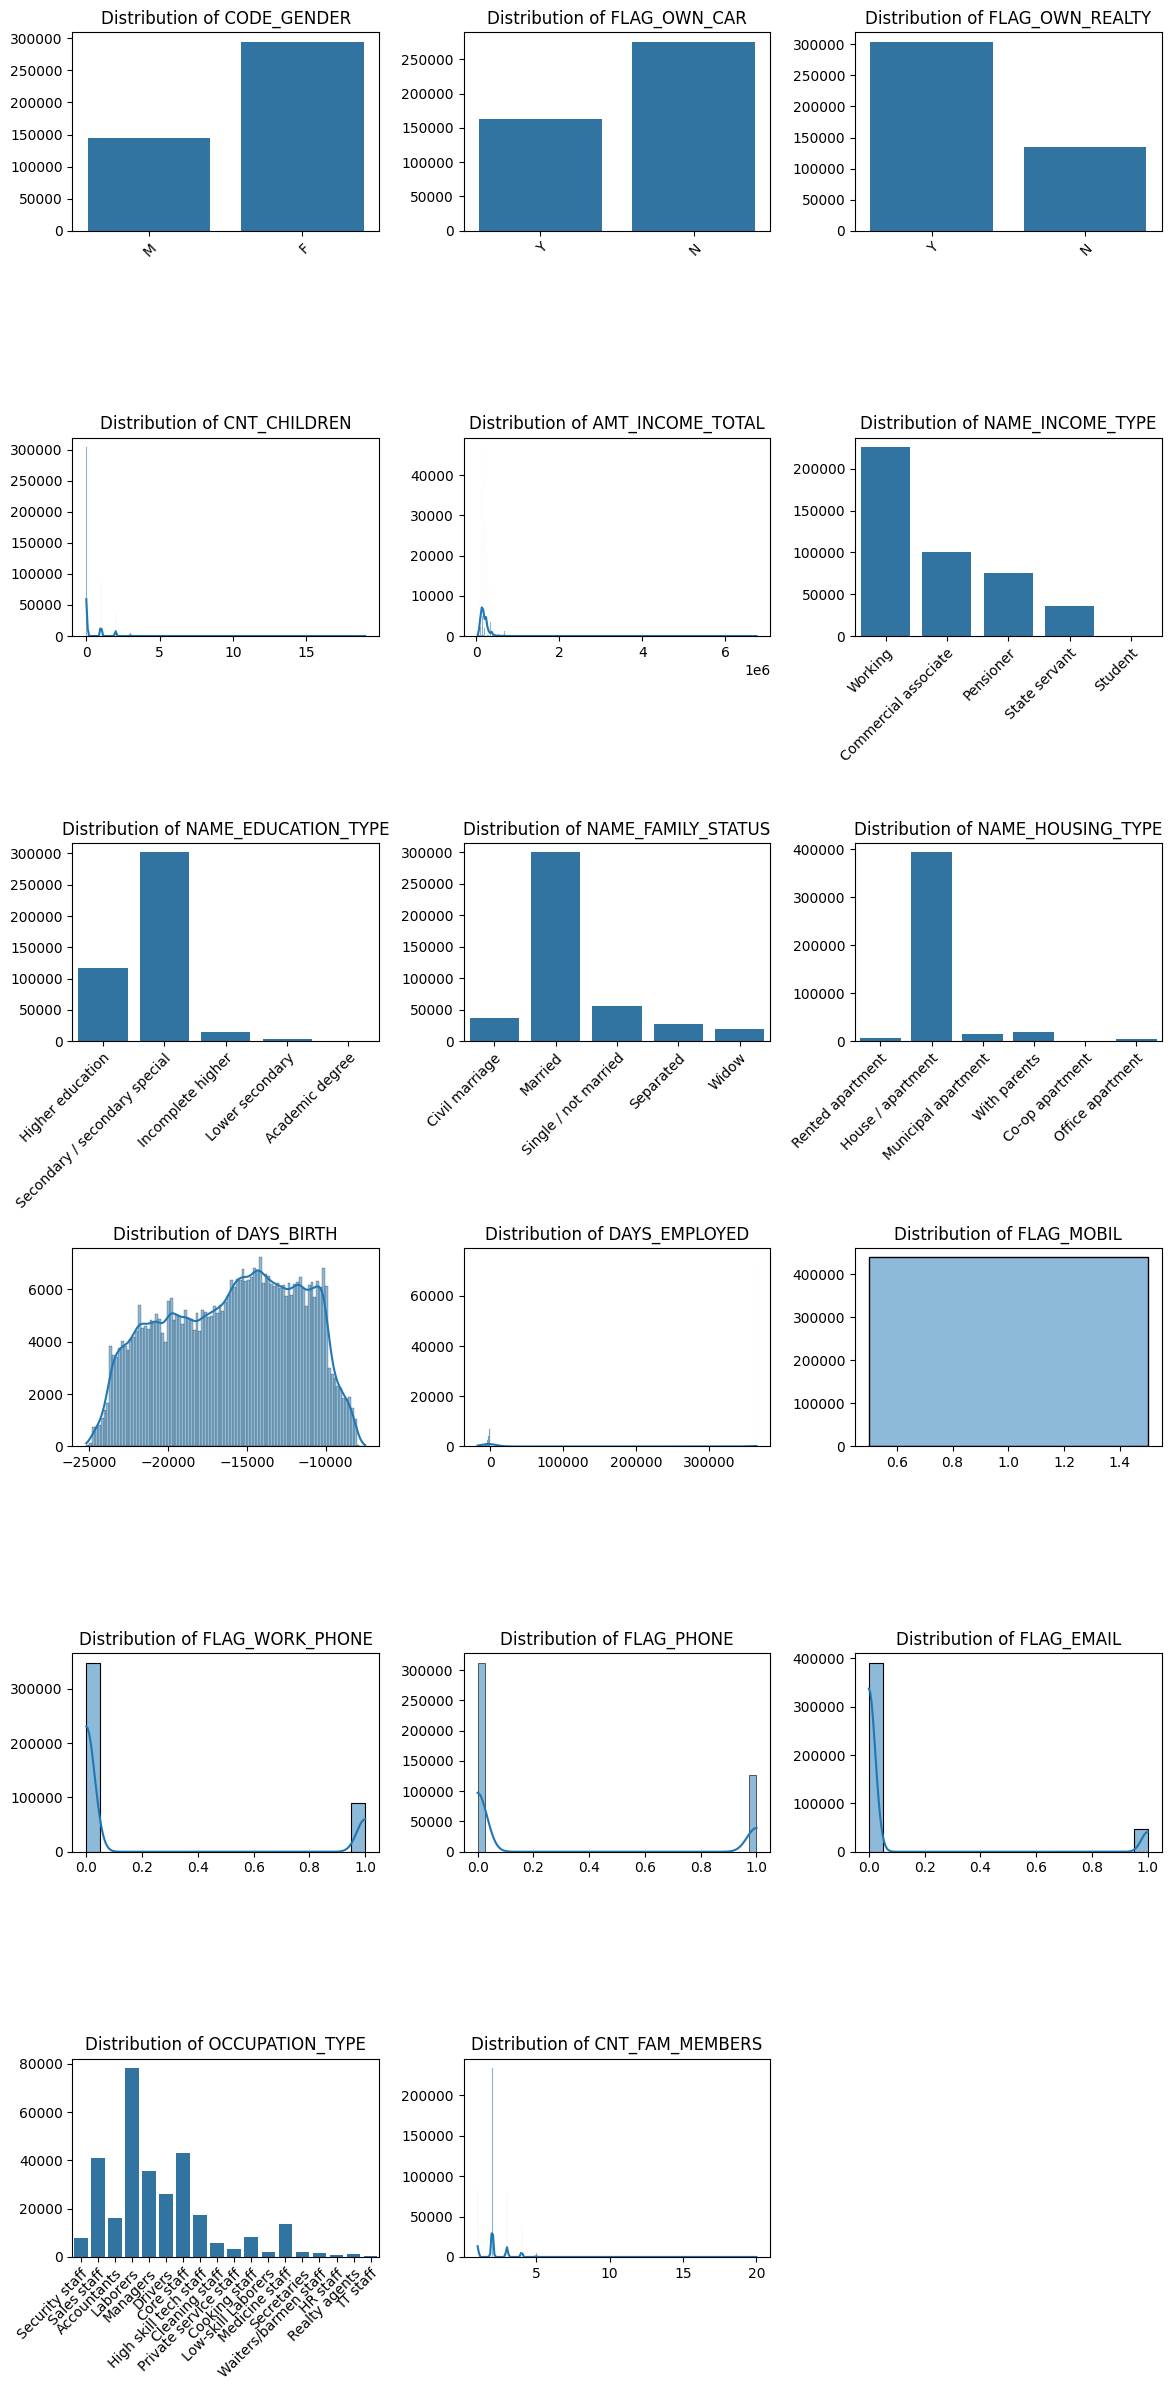

In [90]:
# Plotting distribution of the variables from the application data
all_vars = len(appl_df.columns) - 1  # Excluding 'ID'
num_cols = 3
num_rows = (
    all_vars // num_cols if all_vars % num_cols == 0 else all_vars // num_cols + 1
)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()
all_columns = appl_df.columns.drop("ID")
for i, col in enumerate(all_columns):
    if appl_df[col].dtype == "object":
        sns.countplot(x=appl_df[col], ax=axes[i])
        axes[i].set_xticklabels(
            axes[i].get_xticklabels(), rotation=45, ha="right", wrap=True
        )
    else:
        sns.histplot(appl_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
if all_vars < len(axes):
    for i in range(all_vars, len(axes)):
        fig.delaxes(axes[i])
plt.tight_layout()

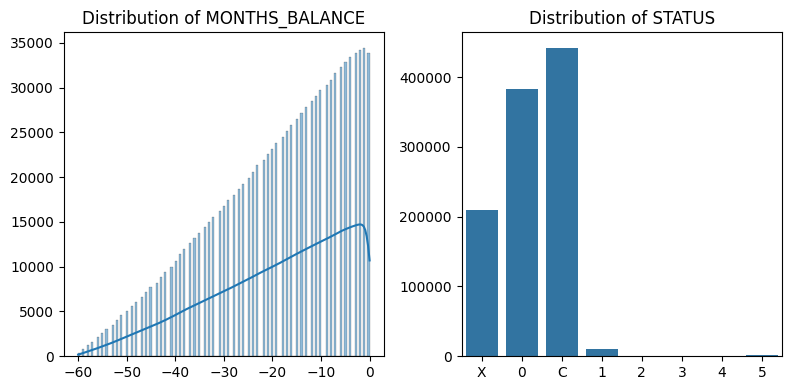

In [91]:
# Plotting distribution of the variables from the credit data
num_vars = (
    len(credit_df.select_dtypes(include=[np.number, "object"]).columns) - 1
)  # Excluding ID column
num_cols = 3
num_rows = (
    num_vars // num_cols if num_vars % num_cols == 0 else num_vars // num_cols + 1
)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()
for i, col in enumerate([col for col in credit_df.columns if col != "ID"]):
    if credit_df[col].dtype == "object" or credit_df[col].dtype == "bool":
        sns.countplot(x=credit_df[col], ax=axes[i])
    else:
        sns.histplot(credit_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
if num_vars < len(axes):
    for i in range(num_vars, len(axes)):
        fig.delaxes(axes[i])
plt.tight_layout()

In [94]:
appl_df = appl_df.drop(["FLAG_EMAIL",'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_MOBIL'], axis=1)

## Merging two files into one dataframe

In [95]:
# Merging the two datasets on ID

merged_df = pd.merge(appl_df, credit_df, on='ID', how='inner')
merged_df.dropna(inplace=True)

In [96]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537667 entries, 31 to 777714
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  DAYS_BIRTH           537667 non-null  int64  
 11  DAYS_EMPLOYED        537667 non-null  int64  
 12  OCCUPATION_TYPE      537667 non-null  object 
 13  CNT_FAM_MEMBERS      537667 non-null  float64
 14  MONTHS_BALANCE       537667 non-null  int64  
 15  STATUS               

In [97]:
merged_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,5.376670e+05,537667.000000,5.376670e+05,537667.000000,537667.000000,537667.000000,537667.000000
mean,5.079231e+06,0.506697,1.971171e+05,-15010.958999,-2762.029935,2.303069,-19.305241
std,4.200200e+04,0.787285,1.041390e+05,3416.418092,2393.919456,0.936852,14.037827
min,5.008806e+06,0.000000,2.700000e+04,-24611.000000,-15713.000000,1.000000,-60.000000
25%,5.044925e+06,0.000000,1.350000e+05,-17594.000000,-3661.000000,2.000000,-29.000000
50%,5.079091e+06,0.000000,1.800000e+05,-14785.000000,-2147.000000,2.000000,-17.000000
75%,5.115755e+06,1.000000,2.295000e+05,-12239.000000,-1050.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,-17.000000,20.000000,0.000000


In [98]:
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,0,C
32,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,-1,C
33,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,-2,C
34,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,-3,C
35,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0,-4,C


In [99]:
len(merged_df)

537667

In [100]:
object_columns = []
for x in merged_df:
      if merged_df[x].dtypes=='object':
        object_columns.append(x)

print(object_columns)

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']


## Converting categorical variable to numerical

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in merged_df:
    if merged_df[x].dtypes=='object':
        merged_df[x] = le.fit_transform(merged_df[x])
        label = le.inverse_transform(merged_df[x].unique())
        print(x, label, merged_df[x].unique())

CODE_GENDER ['M' 'F'] [1 0]
FLAG_OWN_CAR ['Y' 'N'] [1 0]
FLAG_OWN_REALTY ['Y' 'N'] [1 0]
NAME_INCOME_TYPE ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner'] [4 0 2 3 1]
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] [4 1 2 3 0]
NAME_FAMILY_STATUS ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'] [1 3 0 2 4]
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment'] [1 4 2 5 0 3]
OCCUPATION_TYPE ['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff'] [16 14  0  8 10  4  3  6  1 12  2  9 11 15 17  5 13  7]
STATUS ['C' 'X' '0' '1' '5' '4' '3' '2'] [6 7 0 1 5 4 

In [102]:
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,0,6
32,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-1,6
33,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-2,6
34,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-3,6
35,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-4,6


## Checking for outliers

<Axes: xlabel='ID', ylabel='DAYS_BIRTH'>

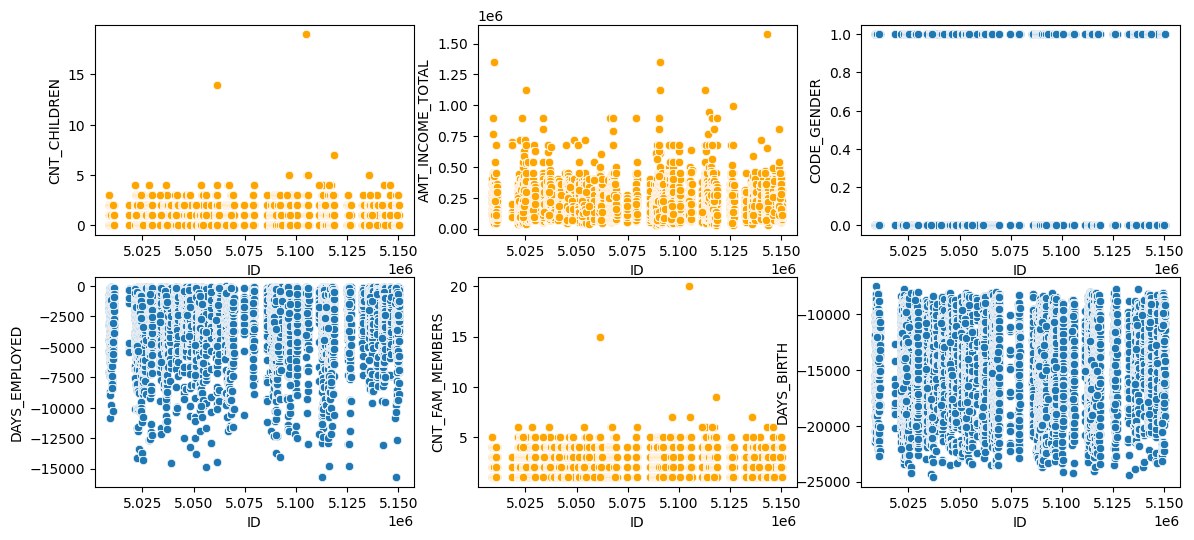

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=merged_df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=merged_df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CODE_GENDER', data=merged_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=merged_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=merged_df, ax=ax[1][1], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=merged_df, ax=ax[1][2])

### Dealing with outliers based on interquatile range

In [108]:
# Select the columns where you want to remove outliers
columns_to_filter = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']

# Calculate lower and upper bounds for each selected column
Q1 = merged_df[columns_to_filter].quantile(0.25)
Q3 = merged_df[columns_to_filter].quantile(0.75)
IQR = Q3-Q1
# Define the boundaries for outlier removal
lower_bound_limits = Q1 - 1.5 * (IQR)
upper_bound_limits = Q3 + 1.5 * (IQR)

# Filter out the rows containing outliers in any of the selected columns
merged_df = merged_df[~((merged_df[columns_to_filter] < lower_bound_limits) | (merged_df[columns_to_filter] > upper_bound_limits)).any(axis=1)]

In [109]:
merged_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,0,6
32,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-1,6
33,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-2,6
34,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-3,6
35,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,16,2.0,-4,6


In [110]:
len(merged_df)

503770

<Axes: xlabel='ID', ylabel='DAYS_BIRTH'>

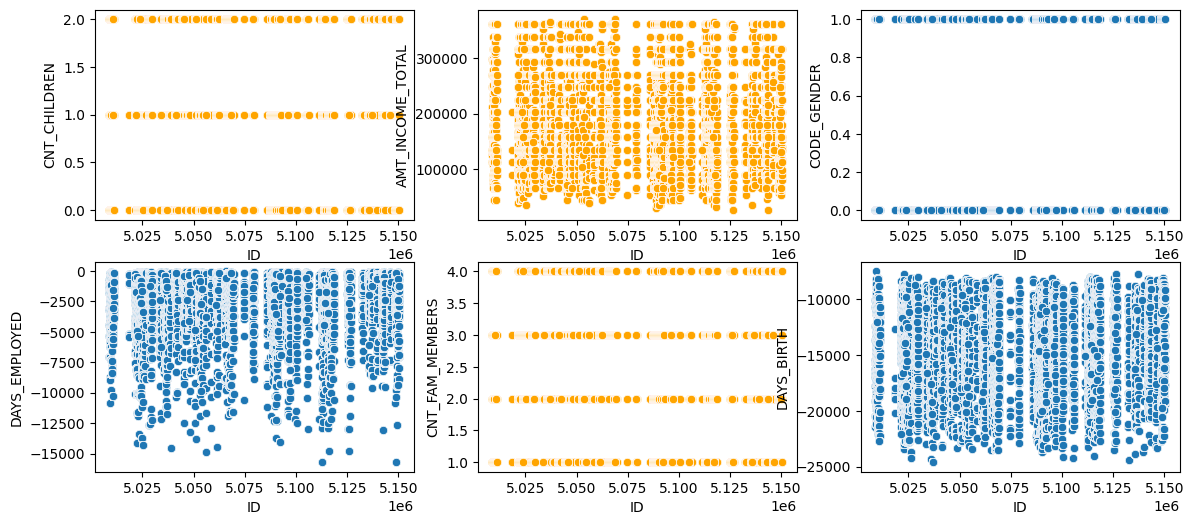

In [111]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=merged_df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=merged_df, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CODE_GENDER', data=merged_df, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=merged_df, ax=ax[1][0])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=merged_df, ax=ax[1][1], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=merged_df, ax=ax[1][2])

In [112]:
merged_df['MONTHS_BALANCE'] = merged_df['MONTHS_BALANCE']*-1

merged_df['STATUS'].replace({7: 0, 6: 0}, inplace = True)
merged_df['STATUS'] = merged_df['STATUS'].astype(int)
merged_df['STATUS'] = merged_df['STATUS'].apply(lambda x:1 if x >= 2 else 0)


<ipython-input-112-ae62c8671abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['MONTHS_BALANCE'] = merged_df['MONTHS_BALANCE']*-1
<ipython-input-112-ae62c8671abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['STATUS'].replace({7: 0, 6: 0}, inplace = True)
<ipython-input-112-ae62c8671abd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [138]:
value_count = merged_df['STATUS'].value_counts(normalize = True)
value_count

STATUS
0    0.996532
1    0.003468
Name: proportion, dtype: float64

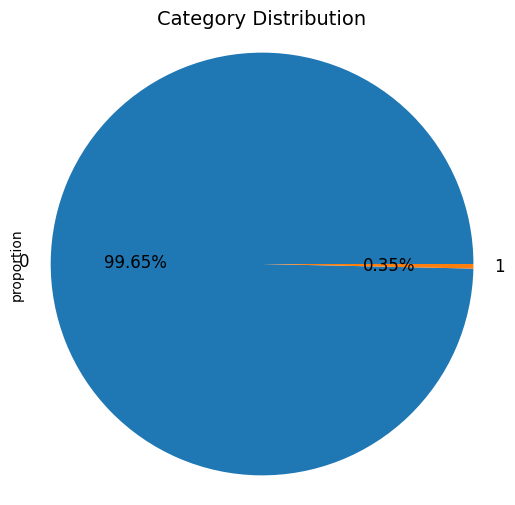

In [137]:


# Create a pie chart
value_count.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), fontsize=12)
plt.title('Category Distribution', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is circular
plt.show()

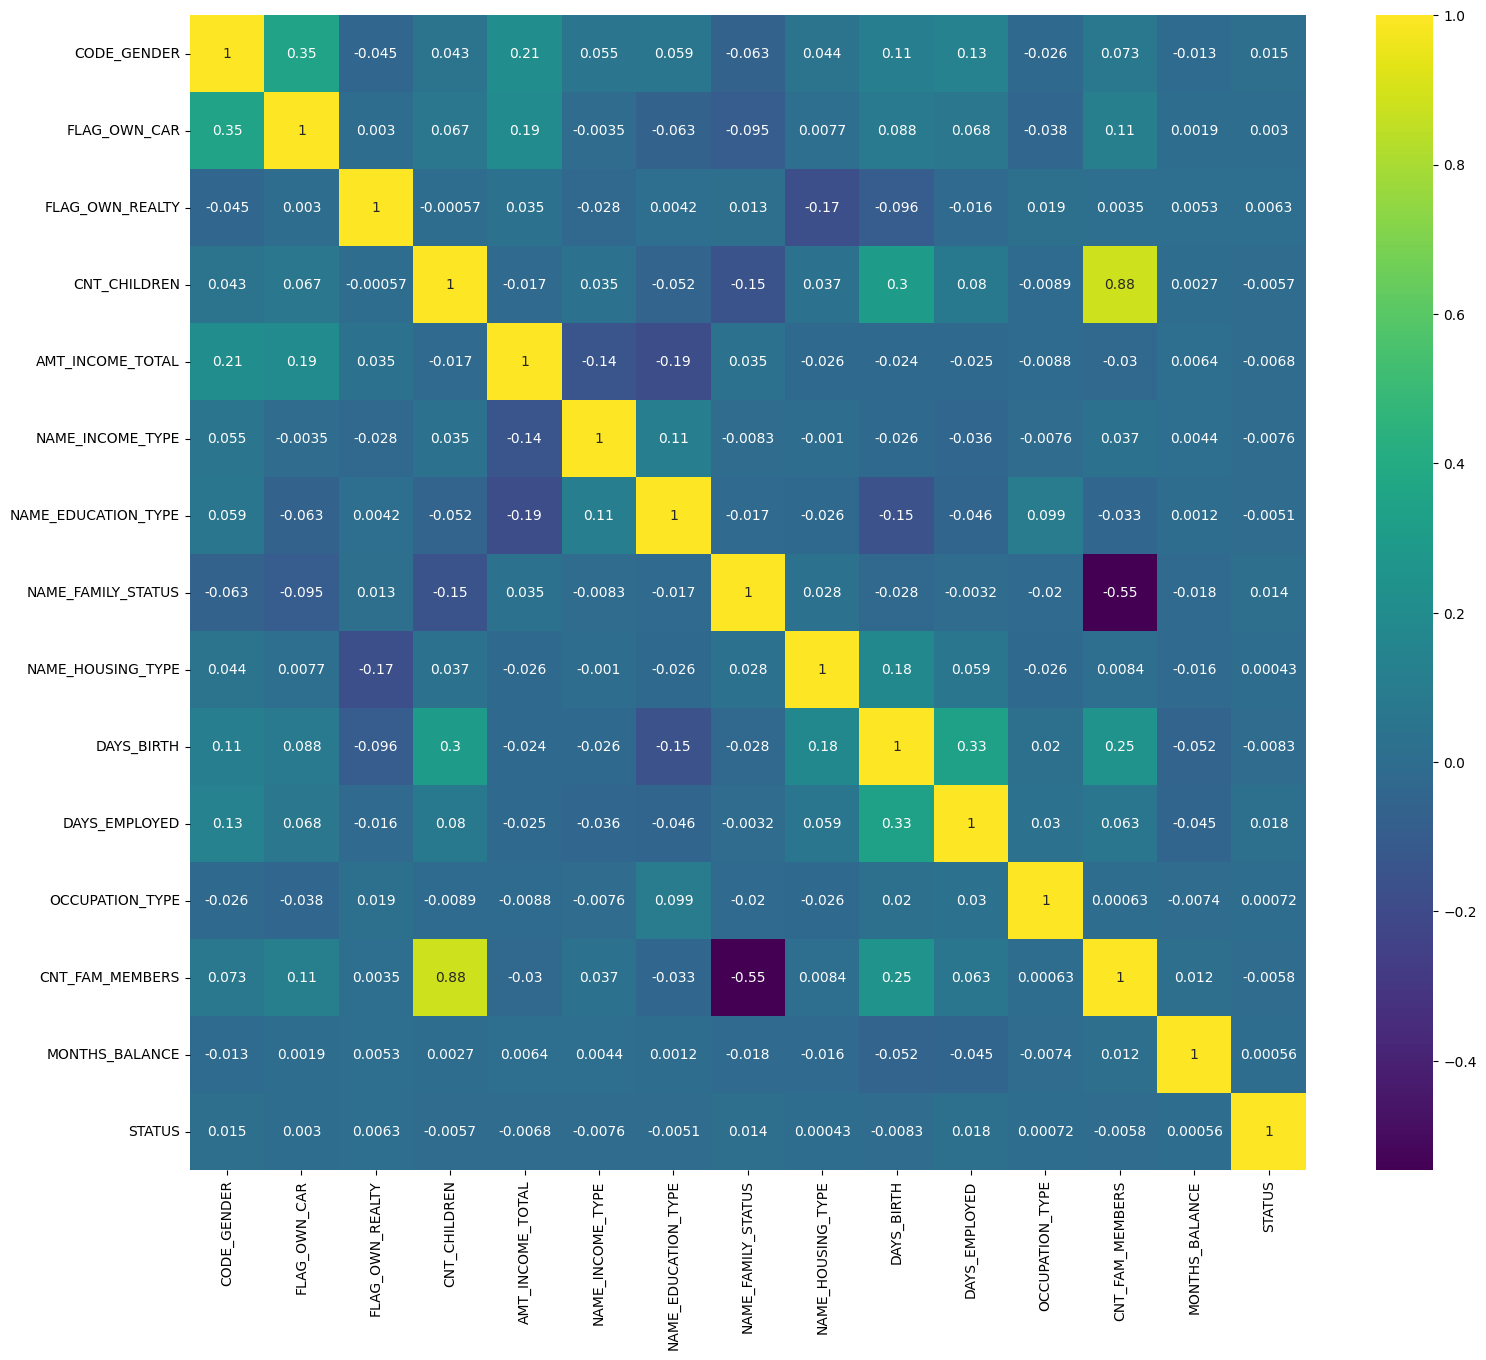

In [114]:
# Check the correlation between features
plt.figure(figsize=(18, 15))
corr = merged_df[
    [
        'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.show()

# Train Test data split and dealing with over sampling data

In [115]:
X = merged_df.drop(["ID",'STATUS'], axis=1)
y = merged_df['STATUS']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [117]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test_scaled, y_test)

# Modeling

---



## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Initialize and train the logistic regression model with regularization
logistic_model = LogisticRegression()
logistic_model.fit(X_balanced, y_balanced)

# Predict on the test set
y_pred = logistic_model.predict(X_test_balanced)

# Calculate the accuracy
accuracy = accuracy_score(y_test_balanced, y_pred)
print(f"Accuracy: {accuracy}")

# Perform cross-validation
scores = cross_val_score(logistic_model,X_balanced, y_balanced, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

# Print the classification report
report = classification_report(y_test_balanced, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.600182608984362
Cross-validation scores: [0.61581965 0.61757404 0.61625798 0.61737485 0.61672749]
Average cross-validation score: 0.6167508009196048
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61    150595
           1       0.61      0.57      0.59    150595

    accuracy                           0.60    301190
   macro avg       0.60      0.60      0.60    301190
weighted avg       0.60      0.60      0.60    301190



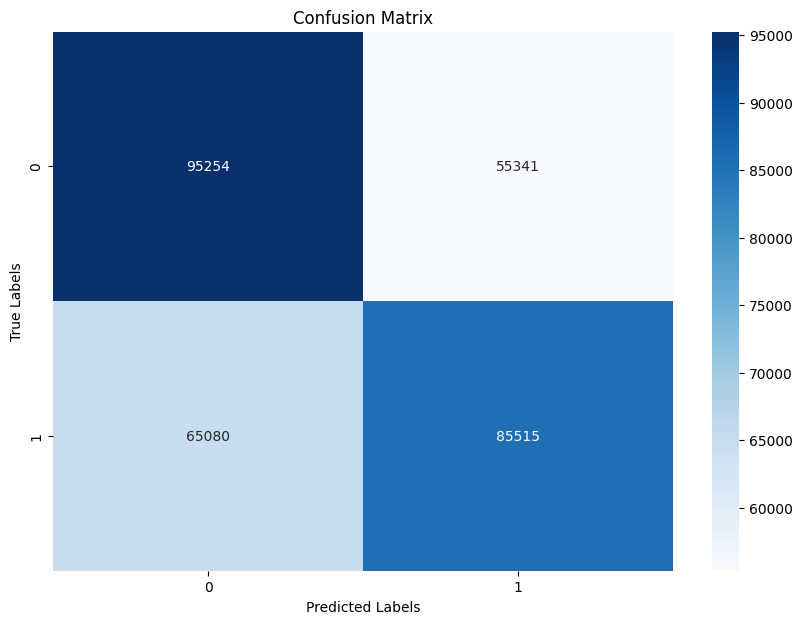

In [120]:
cm = confusion_matrix(y_test_balanced, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [122]:
# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_balanced,y_balanced)

DecisionTreeClassifier()

In [123]:
# Predictions
predictions = dtree.predict(X_test_balanced)

# Evaluation
print("Accuracy:", accuracy_score(y_test_balanced, predictions))
print("Classification Report:\n", classification_report(y_test_balanced,predictions))

Accuracy: 0.8978186526777118
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    150595
           1       1.00      0.80      0.89    150595

    accuracy                           0.90    301190
   macro avg       0.91      0.90      0.90    301190
weighted avg       0.91      0.90      0.90    301190



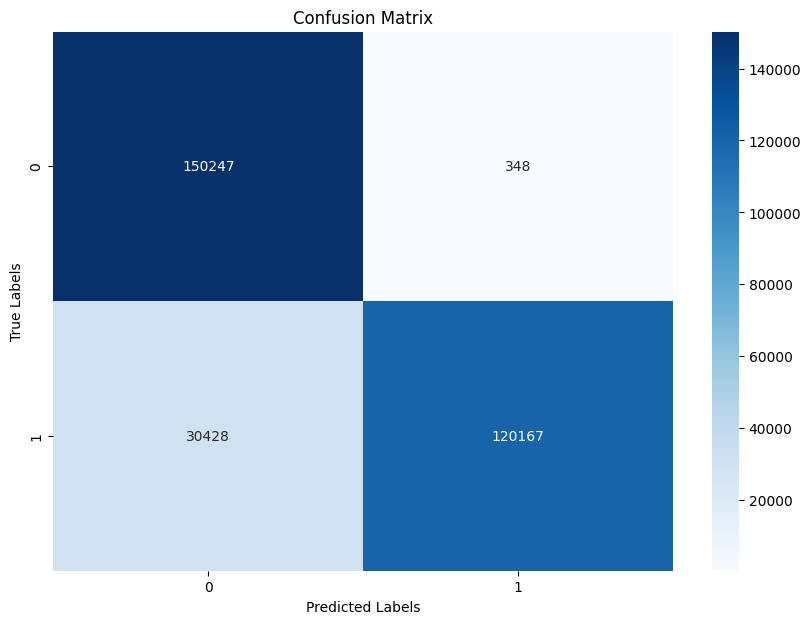

In [124]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_balanced, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(X_balanced,y_balanced)

y_predict = RFC.predict(X_test_balanced)
print("RandomForest Test Accuracy = " , accuracy_score(y_test_balanced, y_predict))
print("Classification Report:\n", classification_report(y_test_balanced,y_predict))

RandomForest Test Accuracy =  0.9032105979614197
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91    150595
           1       1.00      0.81      0.89    150595

    accuracy                           0.90    301190
   macro avg       0.92      0.90      0.90    301190
weighted avg       0.92      0.90      0.90    301190



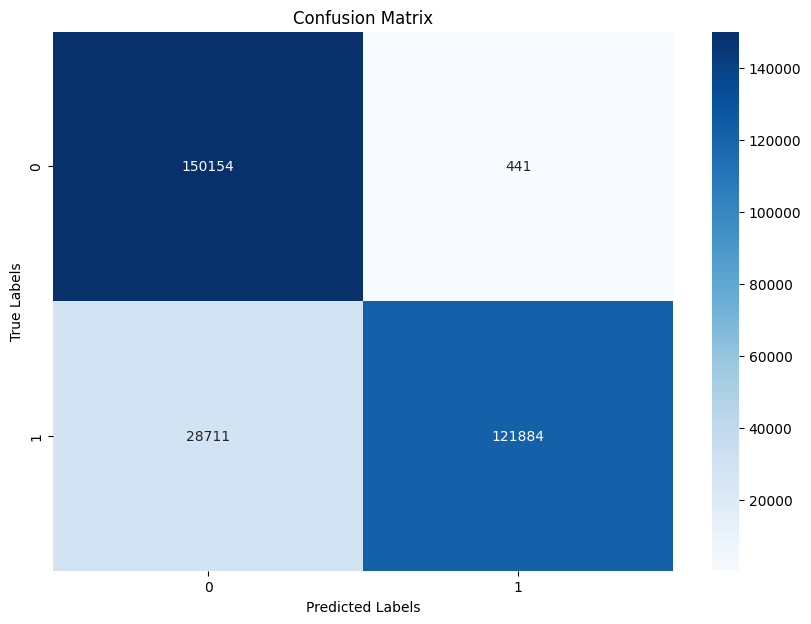

In [ ]:
cm = confusion_matrix(y_test_balanced, y_predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

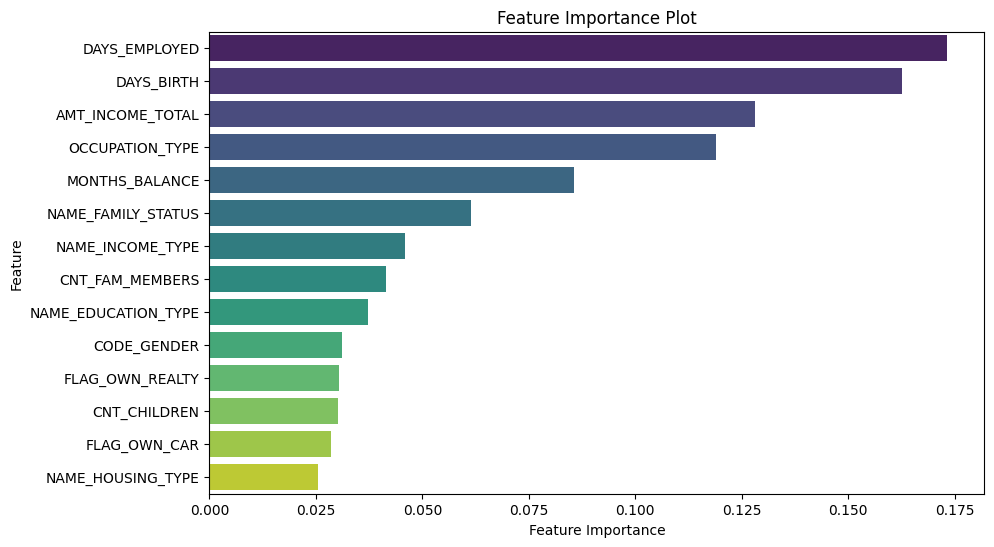

In [ ]:
feat_importances = RFC.feature_importances_

# Create a pandas Series with feature importances
feat_importances_series = pd.Series(feat_importances, index=merged_df.columns[1:-1])

# Sort feature importances in descending order
feat_importances_series = feat_importances_series.sort_values(ascending=False)

# feat_importances_series = feat_importances_series[:6]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


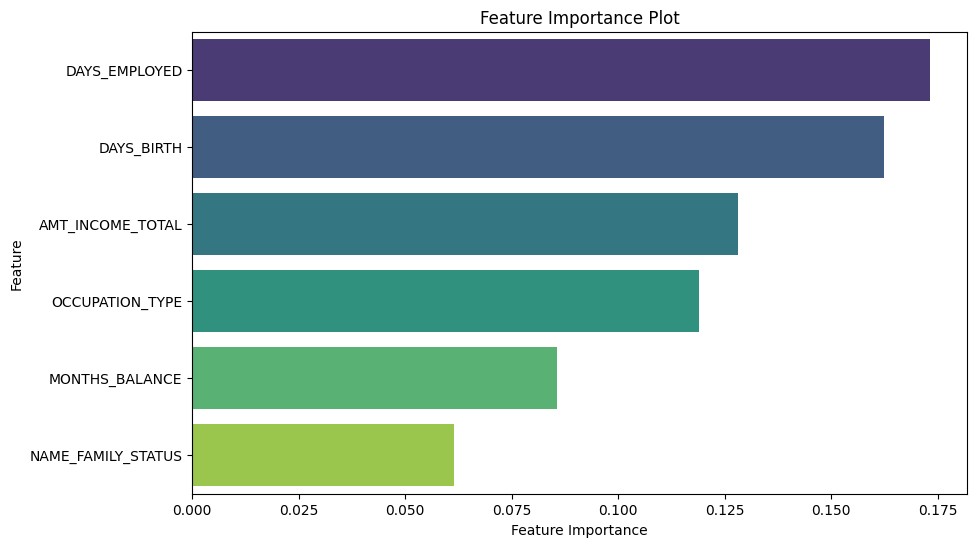

In [ ]:
# Top 6 feature importance

feat_importances_series = feat_importances_series[:6]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_series.values, y=feat_importances_series.index, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()
